#<font color = 'Orange'>Scraping page</font>
You need to scrape the phones with their price from: https://mobelix.com.mk/mk/mobilni-telefoni

The informations you need to extract are:


*   Phone brand: html tag (\<h5 class="mb-0">\)
*   Phone type: html tag (\<h3 class="h5 font-weight-normal">\)
*   Phone price: html tag (\<p class="h5 price">\)



# <font color='Orange'>Requirements specified for Web Scraping</font> (0.1 POINTS)


Import all libraries and modules that you are going to use.

In [2]:
#start here
#shift+enter in this box will run the code that's here and open a new code-box below
#import ....
import numpy as np
import pandas as pd


import requests
from bs4 import BeautifulSoup
from IPython.display import HTML
import statistics
import matplotlib.pyplot as plt

# <font color = 'Orange'> Start the scraping by sending HTTP request</font> (0.3 POINTS)


 **Fetch a website's content - send request**

In [3]:
#add your code
snapshot = requests.get('https://mobelix.com.mk/mk/mobilni-telefoni')

**Get the response-status code and see:**
<li>If the code starts with a 2, it means the request was successful.



In [4]:
#add your code
if (str(snapshot.status_code)[0] == '2'):
    print("request was successful")
else:
    print("request was unsuccessful")

request was successful


# <font color = 'orange'>Parse the HTML with BeautifulSoup</font> (0.3 POINTS)

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.


**Parse using BeautifulSoap**




In [5]:
#add your code
HTML = snapshot.text

parsed_html = BeautifulSoup(HTML, 'html.parser')

**Print the HTML code that you get**

In [6]:
#add your code
print(parsed_html)

<!DOCTYPE html>

<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<title>Мобилни телефони | Mobelix Premium Mobilara</title>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="Мобилни телефони | Mobelix Премиум Мобилара" name="title"/>
<meta content="Mobile Store I Service | Mobelix Premium Mobilara Skopje нуди најголем избор на премиум додатоци за мобилни телефони: маски за мобилни телефони, диспеј, полначи, полначи за кола, бежични полначи, power bank, bluetooth слушалки, usb кабли, фолии и стакла за дисплеј и др." name="description"/>
<meta content="mobilara, mobilara skopje, mobilni dodatoci, мобилни додатоци, полначи, бежични полначи, power bank, Bluetooth slusalki, maski za telefoni" name="keywords"/>
<meta content="Mobelix Премиум Мобилара" property="og:site_name">
<meta content="http://mobelix.com.mk/mk/mobilni-telefoni" property="og:url">
<meta content="Мобилни телефони | Mobelix Премиум Мобилара" p

# <font color='Orange'>Extracting data</font> (0.7 POINTS)

From the printed HTML code search for the data you need for building the dataset, by the classes that are given above in the html tags listed.



**Try to select the first element from your attributes. Find out from the html code what part do you need.**

In [23]:
#add your code
phone_brand = parsed_html.find_all('h5', {'class': 'mb-0'})
phone_type = parsed_html.find_all('h3', {'class': 'h5 font-weight-normal'})
phone_price = parsed_html.find_all('p', {'class': 'h5 price'})

print(phone_brand[0].text, phone_type[0].text, phone_price[0].text)

Blackberry Porsche Design P9981 19,000.00 ден


**Add as many codeboxes as you need for selecting all the html elements**

In [24]:
#add your code
for i in range(len(phone_price)):
    if (phone_price[i].next_element.next_element != "\n"):
        phone_price[i] = phone_price[i].next_element.next_element.next_element.next_element
    else:
        phone_price[i] = phone_price[i].next_element

phone_list = []

for i in range(len(phone_brand)):
    phone_list.append(f'Brand: {phone_brand[i].text}')
    phone_list.append(f'Model: {phone_type[i].text}')
    phone_list.append(f'Price: {phone_price[i].text}')

**Create lists with the extracted data from the html elements that you selected**

In [ ]:
#add your code
#phone_list.append(f'Brand: {phone_brand[i].text}')
#phone_list.append(f'Model: {phone_type[i].text}')
#phone_list.append(f'Price: {phone_price[i].text}')

**Print all lists that are containing the elements**

In [25]:
#add your code
phone_list

['Brand: Blackberry',
 'Model: Porsche Design P9981',
 'Price: 19,000.00 ден',
 'Brand: Samsung',
 'Model: Galaxy A03s 4/64GB',
 'Price: 8,300.00 ден',
 'Brand: Samsung',
 'Model: Galaxy A04s 3/32GB',
 'Price: 8,300.00 ден',
 'Brand: Apple',
 'Model: iPhone 14 Pro Max 128GB E-SIM',
 'Price: 61,500.00 ден',
 'Brand: Apple',
 'Model: iPhone 14 Pro 512GB',
 'Price: 89,200.00 ден',
 'Brand: Apple',
 'Model: iPhone 14 Pro Max 512GB',
 'Price: 78,100.00 ден',
 'Brand: Apple',
 'Model: iPhone 14 Pro Max 1TB',
 'Price: 98,400.00 ден',
 'Brand: Apple',
 'Model: iPhone 14 Pro 128GB E-SIM',
 'Price: 55,300.00 ден',
 'Brand: Apple',
 'Model: iPhone 13 Mini 256GB',
 'Price: 46,800.00 ден']

**Check if all lists are the same size**

In [10]:
#add your code
if len(phone_brand) == len(phone_price) and len(phone_type) == len(phone_brand):
    print("Lists are same size")
else:
    print("Lists are not same size")

Lists are same size


# <font color='Orange'>Create a Pandas DataFrame</font> (0.1 POINTS)





**Create the DataFrame from the lists you get and name your *Columns***

In [11]:
#add your code
df = pd.DataFrame(zip(phone_brand,phone_type,phone_price),columns=['Brand','Type','Price'])
df.head()

,Brand,Type,Price
0,[Blackberry],[Porsche Design P9981],"19,000.00 ден"
1,[Samsung],[Galaxy A03s 4/64GB],"8,300.00 ден"
2,[Samsung],[Galaxy A04s 3/32GB],"8,300.00 ден"
3,[Apple],[iPhone 14 Pro Max 128GB E-SIM],"61,500.00 ден"
4,[Apple],[iPhone 14 Pro 512GB],"89,200.00 ден"


**Print the dataset you obtain**

In [12]:
#add your code
df

,Brand,Type,Price
0,[Blackberry],[Porsche Design P9981],"19,000.00 ден"
1,[Samsung],[Galaxy A03s 4/64GB],"8,300.00 ден"
2,[Samsung],[Galaxy A04s 3/32GB],"8,300.00 ден"
3,[Apple],[iPhone 14 Pro Max 128GB E-SIM],"61,500.00 ден"
4,[Apple],[iPhone 14 Pro 512GB],"89,200.00 ден"
5,[Apple],[iPhone 14 Pro Max 512GB],"78,100.00 ден"
6,[Apple],[iPhone 14 Pro Max 1TB],"98,400.00 ден"
7,[Apple],[iPhone 14 Pro 128GB E-SIM],"55,300.00 ден"
8,[Apple],[iPhone 13 Mini 256GB],"46,800.00 ден"


#<font color='orange'>EDA</font> (0.2 POINTS)

## <font color='Orange'>Find statistic elements for the prices</font>
Like mean, median,  standard deviation, minimum, maximum

In [27]:
#add your code
new_price = []

for price in phone_price:
     new_price.append(price.text.split(" ")[0].replace(",", "").replace(".", ""))

print(statistics.mean(float(number) for number in new_price))
print(statistics.median(float(number) for number in new_price))
print(statistics.stdev(float(number) for number in new_price))
print(min(int(number) for number in new_price))
print(max(int(number) for number in new_price))

5165555.555555556
5530000.0
3401011.2875110805
830000
9840000


# <font color = 'Orange'>Data visualization </font> (0.3 POINTS)

Make a histogram & bar chart for the price values

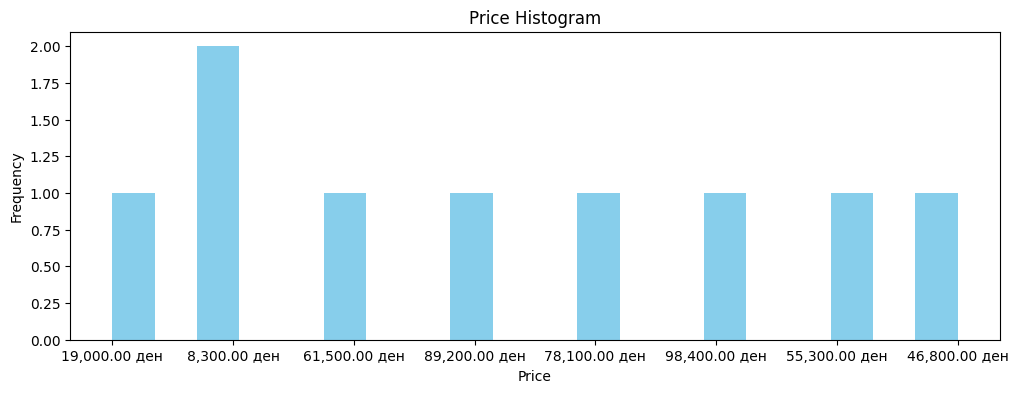

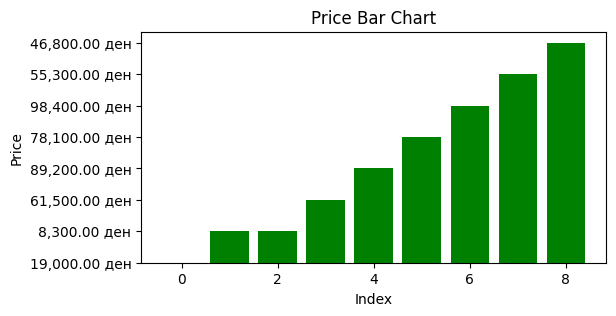

In [41]:
#add your code
plt.figure(figsize=(12, 4))
plt.hist(df["Price"],bins=20,color='skyblue')
plt.title("Price Histogram")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6, 3))
plt.bar(df.index, df["Price"], color='green')
plt.title("Price Bar Chart")
plt.xlabel("Index")
plt.ylabel("Price")
plt.show()